In [ ]:
import pandas as pd
import random
import numpy as np
import seaborn as sns

In [ ]:
dataset = pd.read_csv("credit_data.csv")

In [ ]:
dataset.shape

(2000, 5)

In [ ]:
dataset.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [ ]:
dataset.dropna(inplace=True)
dataset.shape

(1997, 5)

<Axes: xlabel='default', ylabel='count'>

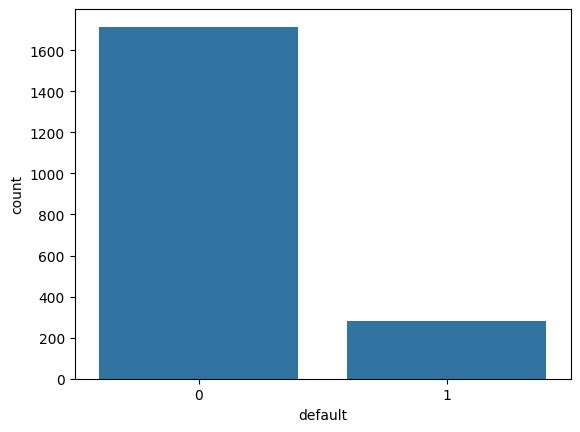

In [ ]:
sns.countplot(x=dataset['default'])

In [ ]:
X = dataset.iloc[:, 1:4].values
X.shape

(1997, 3)

In [ ]:
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [ ]:
y = dataset.iloc[:, 4].values
y.shape

(1997,)

In [ ]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1597, 3), (1597,), (400, 3), (400,))

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [ ]:
np.unique(y_train, return_counts=True)


(array([0, 1]), array([1371,  226]))

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
pred = model.predict(X_test)

In [ ]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(pred, y_test)

0.9225

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(pred, y_test)
cm

array([[336,  24],
       [  7,  33]])

<Axes: >

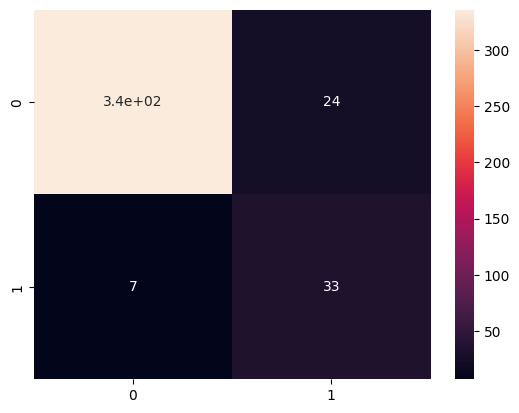

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
from imblearn.under_sampling import TomekLinks

In [ ]:
tl = TomekLinks(sampling_strategy="majority")
X_under, y_under = tl.fit_resample(X, y)

In [ ]:
X_under.shape, y_under.shape

((1897, 3), (1897,))

In [ ]:
np.unique(y_under, return_counts=True)

(array([0, 1]), array([1614,  283]))

In [ ]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2, stratify=y_under)

In [ ]:
X_train_under.shape, y_test_under.shape

((1517, 3), (380,))

In [ ]:
model_under = GaussianNB()
model_under.fit(X_train_under, y_train_under)
pred_under = model_under.predict(X_test_under)
accuracy_score(pred_under, y_test_under)

0.9315789473684211

In [ ]:
cm_under = confusion_matrix(pred_under, y_test_under)
cm_under

array([[315,  18],
       [  8,  39]])

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy="minority")
X_over, y_over = smote.fit_resample(X, y)

In [ ]:
X_over.shape, y_over.shape

((3428, 3), (3428,))

In [ ]:
np.unique(y_over, return_counts=True)

(array([0, 1]), array([1714, 1714]))

In [ ]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_over, y_over, test_size=0.2, stratify=y_over)

In [ ]:
model_o = GaussianNB()
model_o.fit(X_train_o, y_train_o)
pred_o = model_o.predict(X_test_o)
accuracy_score(pred_o, y_test_o)

0.9169096209912536

In [ ]:
cm_o = confusion_matrix(pred_o, y_test_o)
cm_o

array([[299,  13],
       [ 44, 330]])